In [1]:
from getting_data import get_training_data, get_data, get_month_of_year, get_all_data, get_month_day
import numpy as np
from gradient_descent import gradient_descent, cost_j
from normalization import normalize_back, z_normalization
import pandas as pd


In [2]:
daily_avg = get_all_data(1950, 1960, 'TMAX')
(X, x_mu, x_sigma), (y, y_mu, y_sigma) = get_training_data(daily_avg, "TMAX") #, minumum=True)

In [3]:
w = np.random.rand(2, 1)
b = 0.1

In [4]:
w, b, J_h, p_h = gradient_descent(X, y, w, b, 0.07, 100_000)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X, y, w, b, x_mu, x_sigma, y_mu, y_sigma are defined earlier
# and get_month_of_year() returns (month, day) tuples

# Normalize X back to original scale and convert to (month, day)
x_plot = normalize_back(X[:, 0], x_mu, x_sigma)
# x_plot = np.array([get_month_of_year(round(i)) for i in x_plot])
    # pd.set_option('display.max_rows', None)  # Show all rows
    # pd.set_option('display.max_columns', None)  # Show all columns
# Convert (month, day) to "MM-DD" format for labels
x_plot_labels = [f"{int(m):02d}-{int(d):02d}" for m, d in [(get_month_day(daily_avg, round(i) - 1)) for i in x_plot]]
print(x_plot_labels)

['10-01', '10-02', '10-03', '10-04', '10-05', '10-06', '10-07', '10-08', '10-09', '10-10', '10-11', '10-12', '10-13', '10-14', '10-15', '10-16', '10-17', '10-18', '10-19', '10-20', '10-21', '10-22', '10-23', '10-24', '10-25', '10-26', '10-27', '10-28', '10-29', '10-30', '10-31', '11-01', '11-02', '11-03', '11-04', '11-05', '11-06', '11-07', '11-08', '11-09', '11-10', '11-11', '11-12', '11-13', '11-14', '11-15', '11-16', '11-17', '11-18', '11-19', '11-20', '11-21', '11-22', '11-23', '11-24', '11-25', '11-26', '11-27', '11-28', '11-29', '11-30', '12-01', '12-02', '12-03', '12-04', '12-05', '12-06', '12-07', '12-08', '12-09', '12-10', '12-11', '12-12', '12-13', '12-14', '12-15', '12-16', '12-17', '12-18', '12-19', '12-20', '12-21', '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29', '12-30', '12-31', '01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08', '01-09', '01-10', '01-11', '01-12', '01-13', '01-14', '01-15', '01-16', '01-17', '01-18', '01-19', 

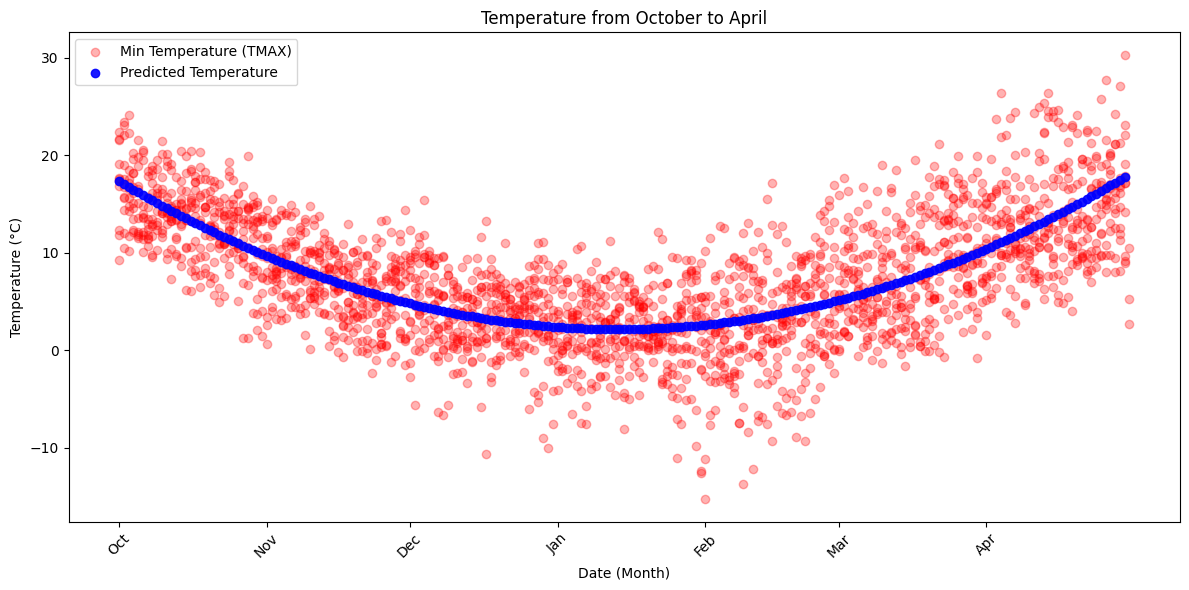

In [6]:
# Compute predicted y using the model (no sorting yet)
X1 = X[:, 0]  # First column
X2 = X[:, 1]  # Second column
y_pred = w[0] * X1 + w[1] * X2 + b
y_pred = normalize_back(y_pred, y_mu, y_sigma)

# Normalize actual y back
y_plot = normalize_back(y, y_mu, y_sigma)

# Define x-axis ticks for the first of each month
months = ['10-01', '11-01', '12-01', '01-01', '02-01', '03-01', '04-01']
month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']

# Find indices in x_plot_labels corresponding to month starts
tick_indices = [i for i, label in enumerate(x_plot_labels) if label in months]

# Plot
plt.figure(figsize=(12, 6))

df_filtered_later = get_data(1950, 1960)
plt.scatter(df_filtered_later['MONTH_DAY'], df_filtered_later['TMAX'], color='red', alpha=0.3, label='Min Temperature (TMAX)')

plt.scatter(x_plot_labels, y_pred, color='blue', alpha=0.9, label="Predicted Temperature")
# plt.scatter(x_plot_labels, y_plot, color='red', alpha=0.3, label="Actual Temperature")



# Labels and title
plt.xlabel("Date (Month)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature from October to April")
plt.legend()

# Set x-axis ticks to show only the first of each month
plt.xticks([x_plot_labels[i] for i in tick_indices], month_labels)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
x_first_april = 182 - x_mu 
x_first_april /= x_sigma
print(x_first_april)
print(w)
y_first_april = w[0,0] * x_first_april + w[1,0] * (x_first_april ** 2) + b
print(y_first_april * y_sigma + y_mu)

1.233691422682393
[[0.02773052]
 [1.08754145]]
10.19188506973692


In [8]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
# print(df_filtered_later[df_filtered_later["DATE" ] == '1950-10-01'])
data_next_years = get_data(1949, 1991)
print(data_next_years['MONTH_DAY'])

0        01-01
1        01-02
2        01-03
3        01-04
4        01-05
5        01-06
6        01-07
7        01-08
8        01-09
9        01-10
10       01-11
11       01-12
12       01-13
13       01-14
14       01-15
15       01-16
16       01-17
17       01-18
18       01-19
19       01-20
20       01-21
21       01-22
22       01-23
23       01-24
24       01-25
25       01-26
26       01-27
27       01-28
28       01-29
29       01-30
30       01-31
31       02-01
32       02-02
33       02-03
34       02-04
35       02-05
36       02-06
37       02-07
38       02-08
39       02-09
40       02-10
41       02-11
42       02-12
43       02-13
44       02-14
45       02-15
46       02-16
47       02-17
48       02-18
49       02-19
50       02-20
51       02-21
52       02-22
53       02-23
54       02-24
55       02-25
56       02-26
57       02-27
58       02-28
59       03-01
60       03-02
61       03-03
62       03-04
63       03-05
64       03-06
65       03-07
66       0